In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/house02.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
!pip install streamlit pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 636.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00


2024-10-07 02:46:47.773 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:46:47.979 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-07 02:46:47.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:46:47.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:46:47.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:46:47.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:46:48.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:46:48.002 Session state does not 

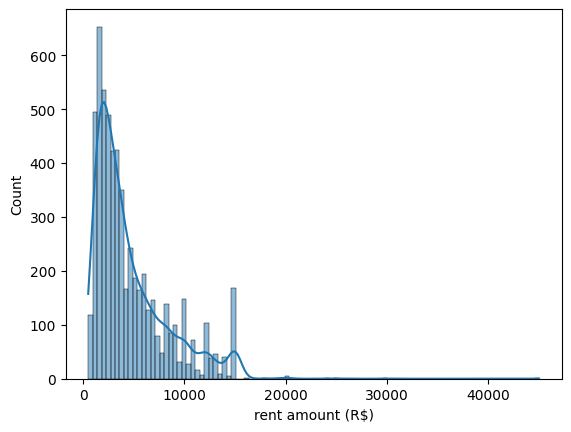

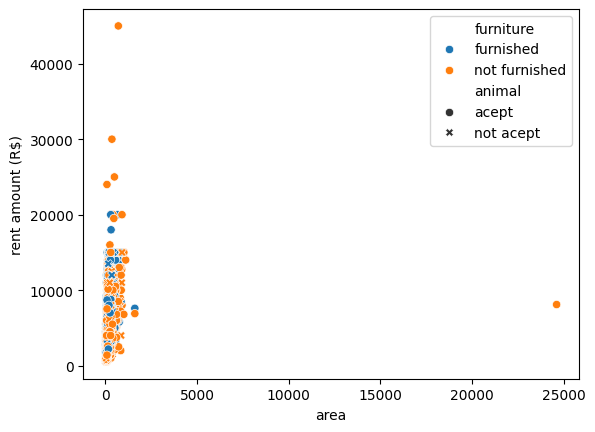

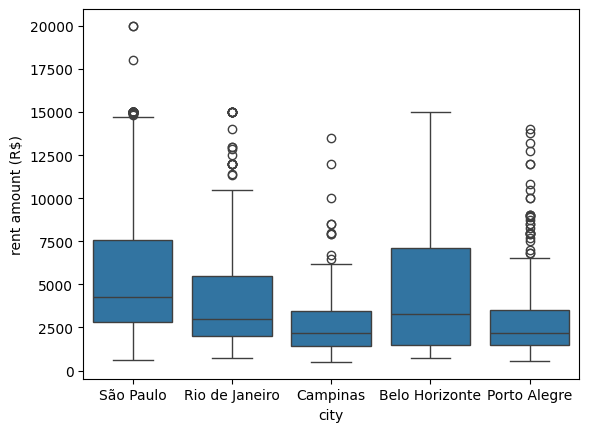

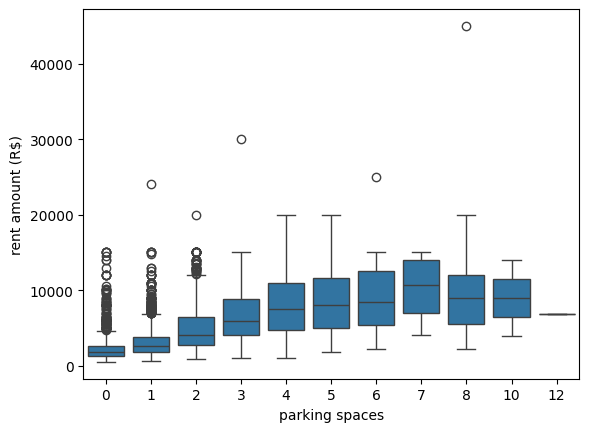

In [5]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('house02.csv')

# Título do dashboard
st.title('Dashboard de Aluguel de Casas no Brasil')

# Filtro para selecionar a cidade
cidade = st.selectbox('Selecione a cidade', df['city'].unique())

# Filtrar os dados pela cidade selecionada
df_filtered = df[df['city'] == cidade]

# Gráfico 1: Distribuição dos valores de aluguel na cidade selecionada
st.subheader(f'Distribuição de Valores de Aluguel em {cidade}')
fig, ax = plt.subplots()
sns.histplot(df_filtered['rent amount (R$)'], kde=True, ax=ax)
st.pyplot(fig)

# Gráfico 2: Relação entre área do imóvel e valor do aluguel
st.subheader(f'Relação entre Área e Valor do Aluguel em {cidade}')
fig, ax = plt.subplots()
sns.scatterplot(data=df_filtered, x='area', y='rent amount (R$)', hue='furniture', style='animal', ax=ax)
st.pyplot(fig)

# Gráfico 3: Comparação de imóveis mobiliados e não mobiliados
st.subheader('Comparação de Imóveis Mobiliados vs Não Mobiliados')
furnished_option = st.radio("Escolha o tipo de imóvel", ('furnished', 'not furnished'))
df_furnished = df[df['furniture'] == furnished_option]
fig, ax = plt.subplots()
sns.boxplot(data=df_furnished, x='city', y='rent amount (R$)', ax=ax)
st.pyplot(fig)

# Gráfico 4: Número de vagas de estacionamento em relação ao aluguel
st.subheader(f'Vagas de Estacionamento x Valor de Aluguel em {cidade}')
fig, ax = plt.subplots()
sns.boxplot(data=df_filtered, x='parking spaces', y='rent amount (R$)', ax=ax)
st.pyplot(fig)

# Conclusões
st.subheader("Conclusões")
st.write("""
Este dashboard permite uma análise dos preços de aluguel de imóveis em diferentes cidades do Brasil. Os gráficos mostram padrões interessantes como:
- A relação entre a área do imóvel e o valor do aluguel, indicando que imóveis maiores tendem a ter aluguéis mais caros.
- Diferenças de preço entre imóveis mobiliados e não mobiliados, dependendo da cidade.
- A distribuição de preços e a variação dependendo do número de vagas de estacionamento.
""")

In [6]:
!streamlit run dashboard.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.2:8501
  External URL: http://34.41.194.122:8501

  Stopping...
  Stopping...
